# Pretrained Model

## Imports

In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F

## Data

In [2]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/model_layers.py" .
  %cp "/content/drive/My Drive/autoencoder-training/pretrainedModel.py" .
  import pretrainedModel
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"
  from resnet_autoencoder_training import pretrainedModel

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
np.random.seed(3333)
torch.manual_seed(3333)

size = 32
batchsize = 128
#tfms = get_transforms(do_flip = True)
path = untar_data(URLs.MNIST)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0, 
                      p_lighting=0.75)
src = (ImageImageList.from_folder(path).split_by_folder("training", "testing").label_from_func(lambda x: x))
data = (src.transform(tfms, size=size, tfm_y=True).databunch(bs=batchsize).normalize(imagenet_stats, do_y = False))

## Pretrained Resnet 34 Model

In [4]:
autoencoder = pretrainedModel.autoencoder(True)

Downloading: "https://github.com/pytorch/vision/archive/v0.5.0.zip" to /root/.cache/torch/hub/v0.5.0.zip
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn = Learner(data, autoencoder, loss_func = F.mse_loss)

In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.046131,0.044576,01:38
1,0.043076,0.041039,01:35
2,0.040681,0.039511,01:35
3,0.039052,0.038465,01:35
4,0.038388,0.037670,01:34


### Unfreeze weights

In [7]:
learn.split(lambda m: (m.encoder.encoder[0][1], m.encoder.encoder[0][2], m.encoder.encoder[0][3], m.encoder.encoder[0][4], m.encoder.encoder[0][5], 
                       m.encoder.encoder[0][6], m.encoder.encoder[0][7], m.encoder.encoder[1], m.decoder))
print("unfroze")

unfroze


In [8]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-03
Min loss divided by 10: 1.45E-02


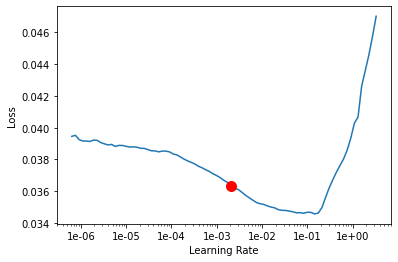

In [9]:
learn.recorder.plot(suggestion = True)

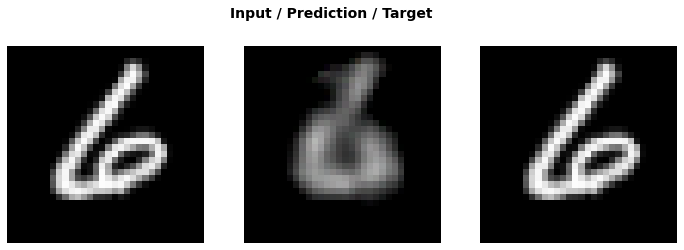

In [10]:
learn.show_results(rows = 1)

In [11]:
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]
learn.unfreeze()
learn.fit_one_cycle(10, max_lr = slice(1e-06, 1e-02))

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.018399,0.015197,0.015197,0.048397,0.813611,0.813776,01:43
1,0.010525,0.009348,0.009348,0.035291,0.885934,0.886174,01:44
2,0.007567,0.006040,0.006040,0.027141,0.925883,0.925939,01:44
3,0.005782,0.006906,0.006906,0.030028,0.915240,0.919679,01:44
4,0.005275,0.004979,0.004979,0.024521,0.939684,0.939726,01:44
5,0.004424,0.003771,0.003771,0.021123,0.954028,0.954212,01:43
6,0.003945,0.003362,0.003362,0.019951,0.959142,0.959216,01:44
7,0.003495,0.003384,0.003384,0.019477,0.959478,0.959769,01:43
8,0.003245,0.002910,0.002910,0.018001,0.965035,0.965051,01:43
9,0.003156,0.003003,0.003003,0.018001,0.964206,0.964216,01:43


### Results

#### Training

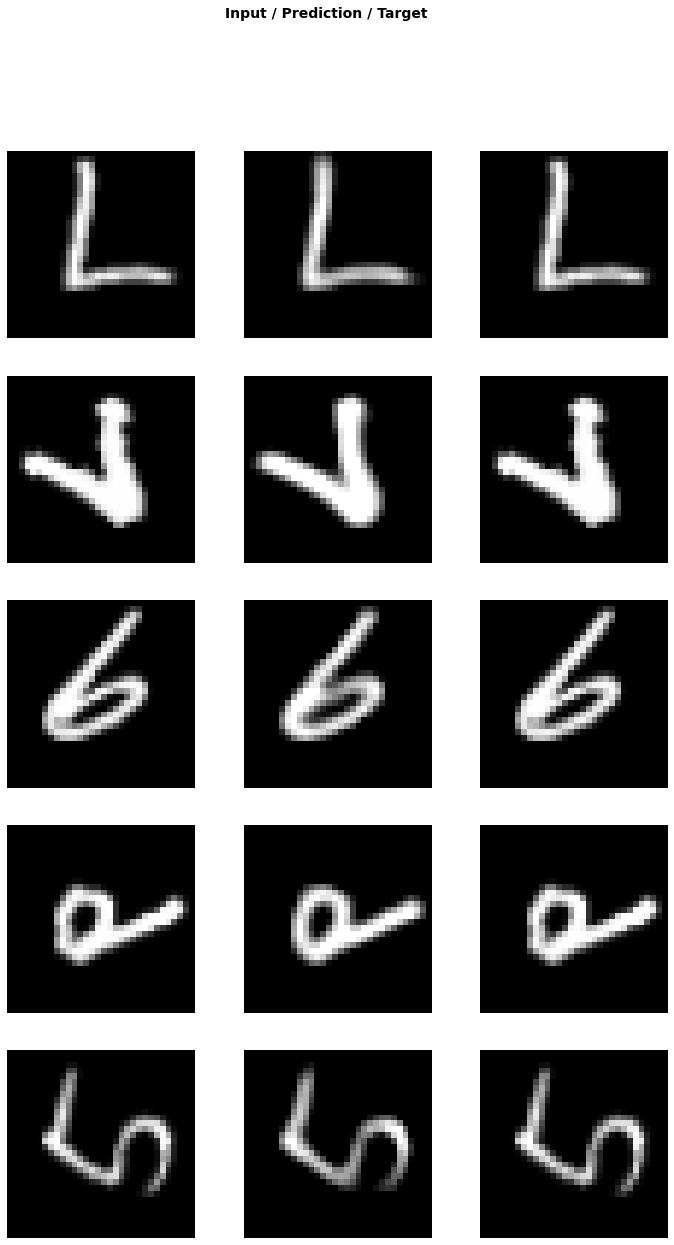

In [12]:
learn.show_results(ds_type=DatasetType.Train)

#### Valdiation

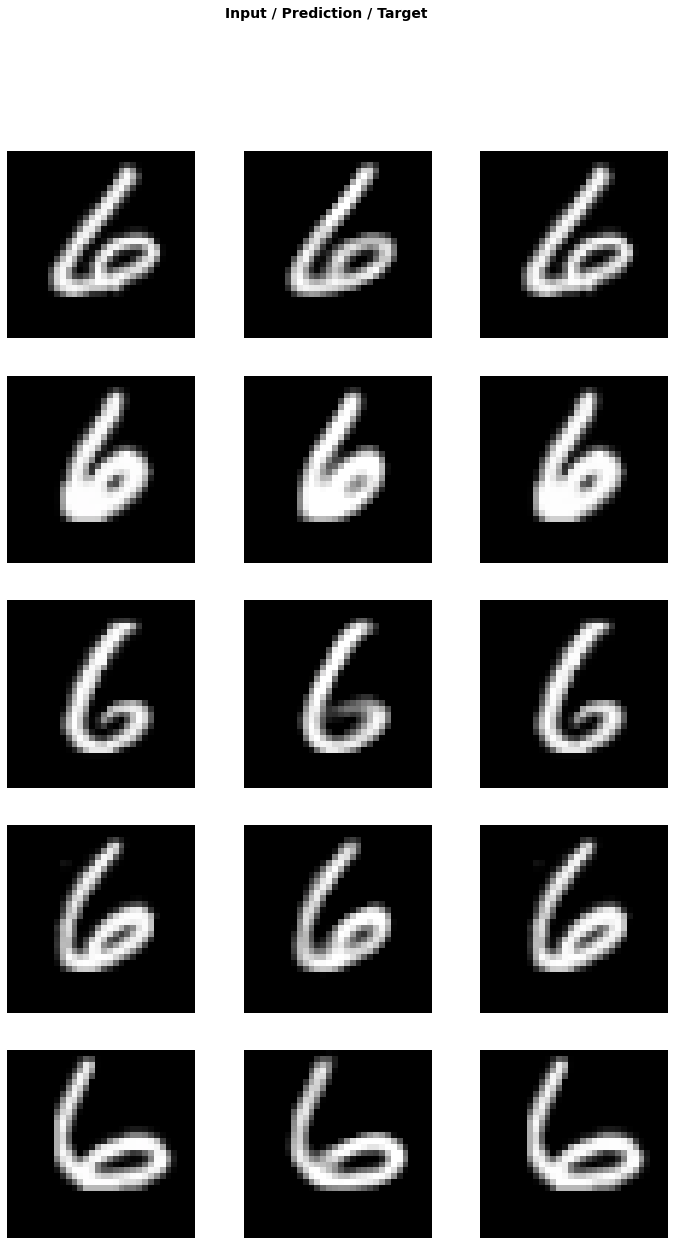

In [13]:
learn.show_results(ds_type=DatasetType.Valid)

In [0]:
torch.save(autoencoder, "/content/drive/My Drive/autoencoder-training/preTrained-MNIST.pt")

## Resnet without pretraining

### Model  

In [15]:
autoencoder = pretrainedModel.autoencoder(False)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


In [0]:
learn = Learner(data, autoencoder, loss_func = F.mse_loss)

In [17]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.013680,0.025833,01:43
1,0.007439,0.009950,01:42
2,0.005235,0.006267,01:43
3,0.003735,0.003550,01:42
4,0.003140,0.003188,01:42


In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-06
Min loss divided by 10: 6.31E-08


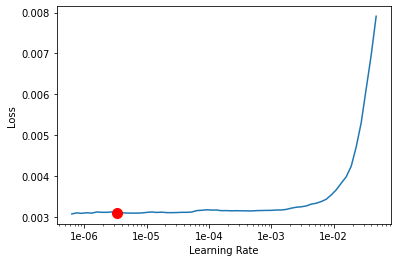

In [19]:
learn.recorder.plot(suggestion = True)

In [20]:
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]
learn.fit_one_cycle(10, max_lr = 1e-04)

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.003137,0.003387,0.003387,0.018405,0.952649,0.952660,01:42
1,0.003101,0.003136,0.003136,0.018122,0.957376,0.957386,01:42
2,0.003044,0.003720,0.003720,0.018601,0.945913,0.945981,01:42
3,0.003010,0.003158,0.003158,0.018007,0.956340,0.956461,01:42
4,0.002916,0.004554,0.004554,0.019386,0.929625,0.929630,01:42
5,0.002904,0.003539,0.003539,0.018122,0.948472,0.948477,01:41
6,0.002832,0.003743,0.003743,0.018261,0.944444,0.944460,01:42
7,0.002790,0.003640,0.003640,0.018069,0.946267,0.946272,01:41
8,0.002785,0.004714,0.004714,0.019295,0.926023,0.926036,01:42
9,0.002796,0.003589,0.003589,0.018034,0.947198,0.947215,01:42


### Results

#### Training

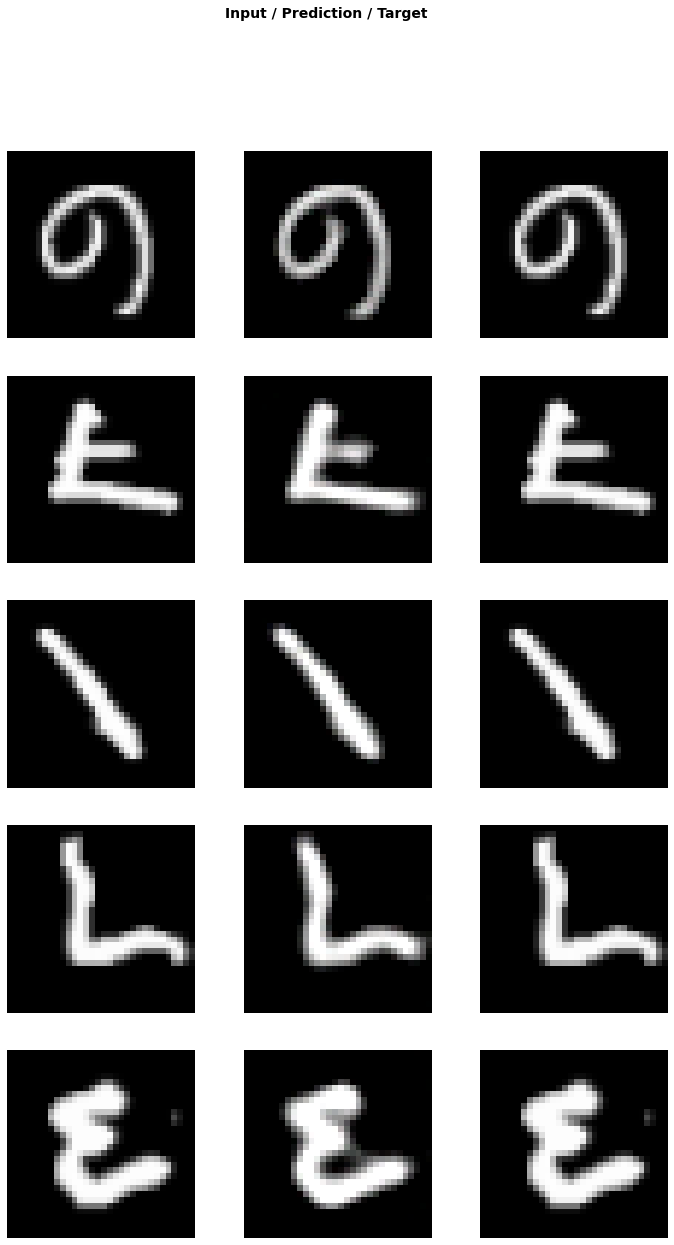

In [21]:
learn.show_results(ds_type=DatasetType.Train)

#### Validation

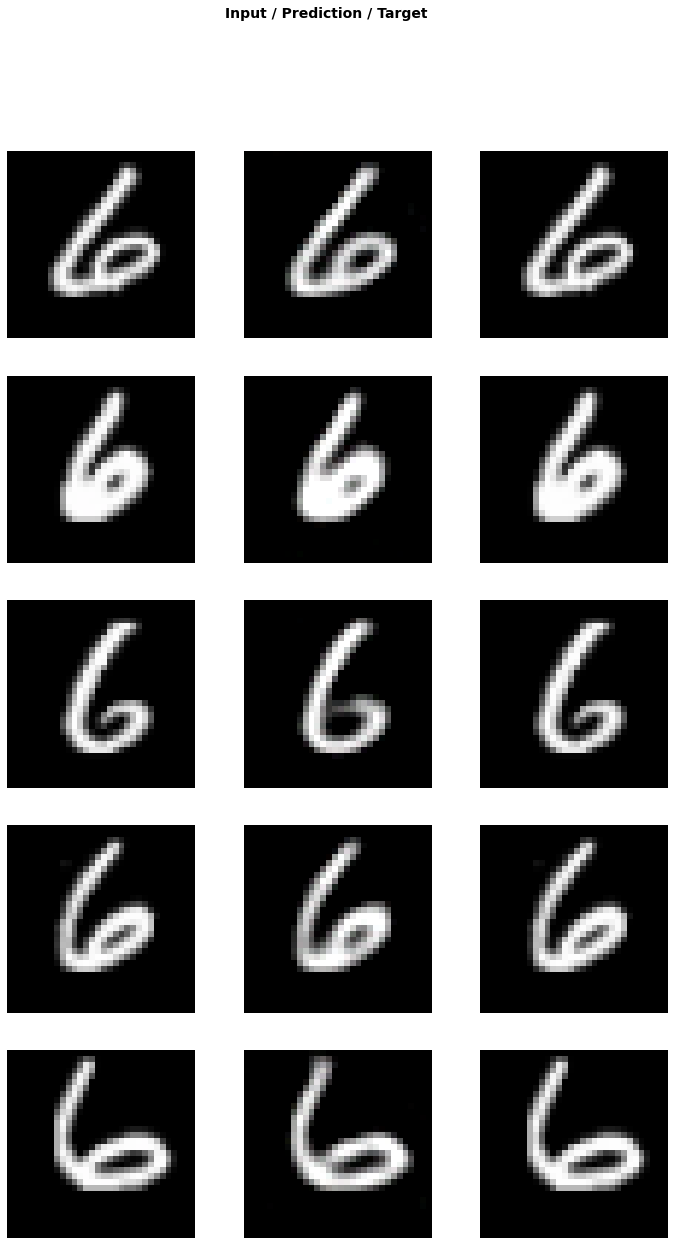

In [22]:
learn.show_results(ds_type=DatasetType.Valid)

In [0]:
torch.save(autoencoder, "/content/drive/My Drive/autoencoder-training/preTrained_nonweights-MNIST.pt")